<h1><b><font color = black><a id='division_ID0'>GLOBAL TERRORISM ANALYSIS & PREDICTION</a></font></b></h1><br>
<b>Built by Arijit Roy, Arkadeep Roy, Soumodip Ghosh, Ankita Datta, Shayani Das</b>
<br><b>Guidance - Indranil Das, Technical Analyst, Webskitters Academy</b>
<br><b>In Association with Webskitters Academy</b>
<br><b>Hooghly Engineering & Technology College</b>

<p><b>This data is collected from - <a href = "https://gtd.terrorismdata.com/register-type/?type=non-commercial">Global Terrorism Database</a></b></p>

<p><b>Global Terrorism Code Book - <a href = "https://www.start.umd.edu/gtd/downloads/Codebook.pdf">Click Here</a></b></p>

<p>The Global Terrorism Database (GTD) is an open-source database including information on domestic and international terrorist attacks around the world from 1970 through 2019, and now includes more than 200,000 cases. For each event, information is available on the date and location of the incident, the weapons used and nature of the target, the number of casualties, and–when identifiable–the group or individual responsible.<br>
The National Consortium for the Study of Terrorism and Responses to Terrorism (START) makes the GTD available via this online interface in an effort to increase understanding of terrorist violence so that it can be more readily studied and defeated.</p>

<b>Charactertistics</b>
- Contains information on over 200,000 terrorist attacks
- Currently the most comprehensive unclassified database on terrorist attacks in the world
- Includes information on more than 95,000 bombings, 20,000 assassinations, and 15,000 kidnappings and hostage events since 1970
- Includes information on at least 45 variables for each case, with more recent incidents including information on more than 120 variables
- More than 4,000,000 news articles and 25,000 news sources were reviewed to collect incident data from 1998 to 2019 alone

<h3><b>Contents</b></h3>

[Data Collection](#division_ID1) | [Data Preprocessing](#division_ID2) | [Feature Extraction](#division_ID3) | [Data Visualization](#division_ID4) | [Model Training](#division_ID5)| [Model Evaluation](#division_ID6) | [Model Testing](#division_ID7) | [Model Saving](#division_ID8) | [User Interactive](#division_ID9)

<h2><a id='division_ID1'>Data Collection</a></h2>

[MENU](#division_ID0)

In [1]:
import pandas as pd
df = pd.read_csv('global_terrorism.csv', encoding = 'ISO-8859-1', low_memory=False)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


<h2><a id='division_ID2'>Data Preprocessing</a></h2>

[MENU](#division_ID0)

In [2]:
# check the null values for every column
j = 0
data1 = []
data2 = []
data3 = []
data4 = []
for i in df.columns:
    data1.append(j)
    data2.append(i)
    data3.append(df[i].isnull().sum())
    data4.append((df[i].isnull().sum()/len(df))*100)
    j = j + 1
data = list(zip(data1, data2, data3, data4))
col_stats = pd.DataFrame(data, columns = ['Column Index', 'Column Name', 'Null Values', 'NA %'])
col_stats

,Column Index,Column Name,Null Values,NA %
0,0,eventid,0,0.000000
1,1,iyear,0,0.000000
2,2,imonth,0,0.000000
3,3,iday,0,0.000000
4,4,approxdate,172452,94.914993
...,...,...,...,...
130,130,INT_LOG,0,0.000000
131,131,INT_IDEO,0,0.000000
132,132,INT_MISC,0,0.000000
133,133,INT_ANY,0,0.000000


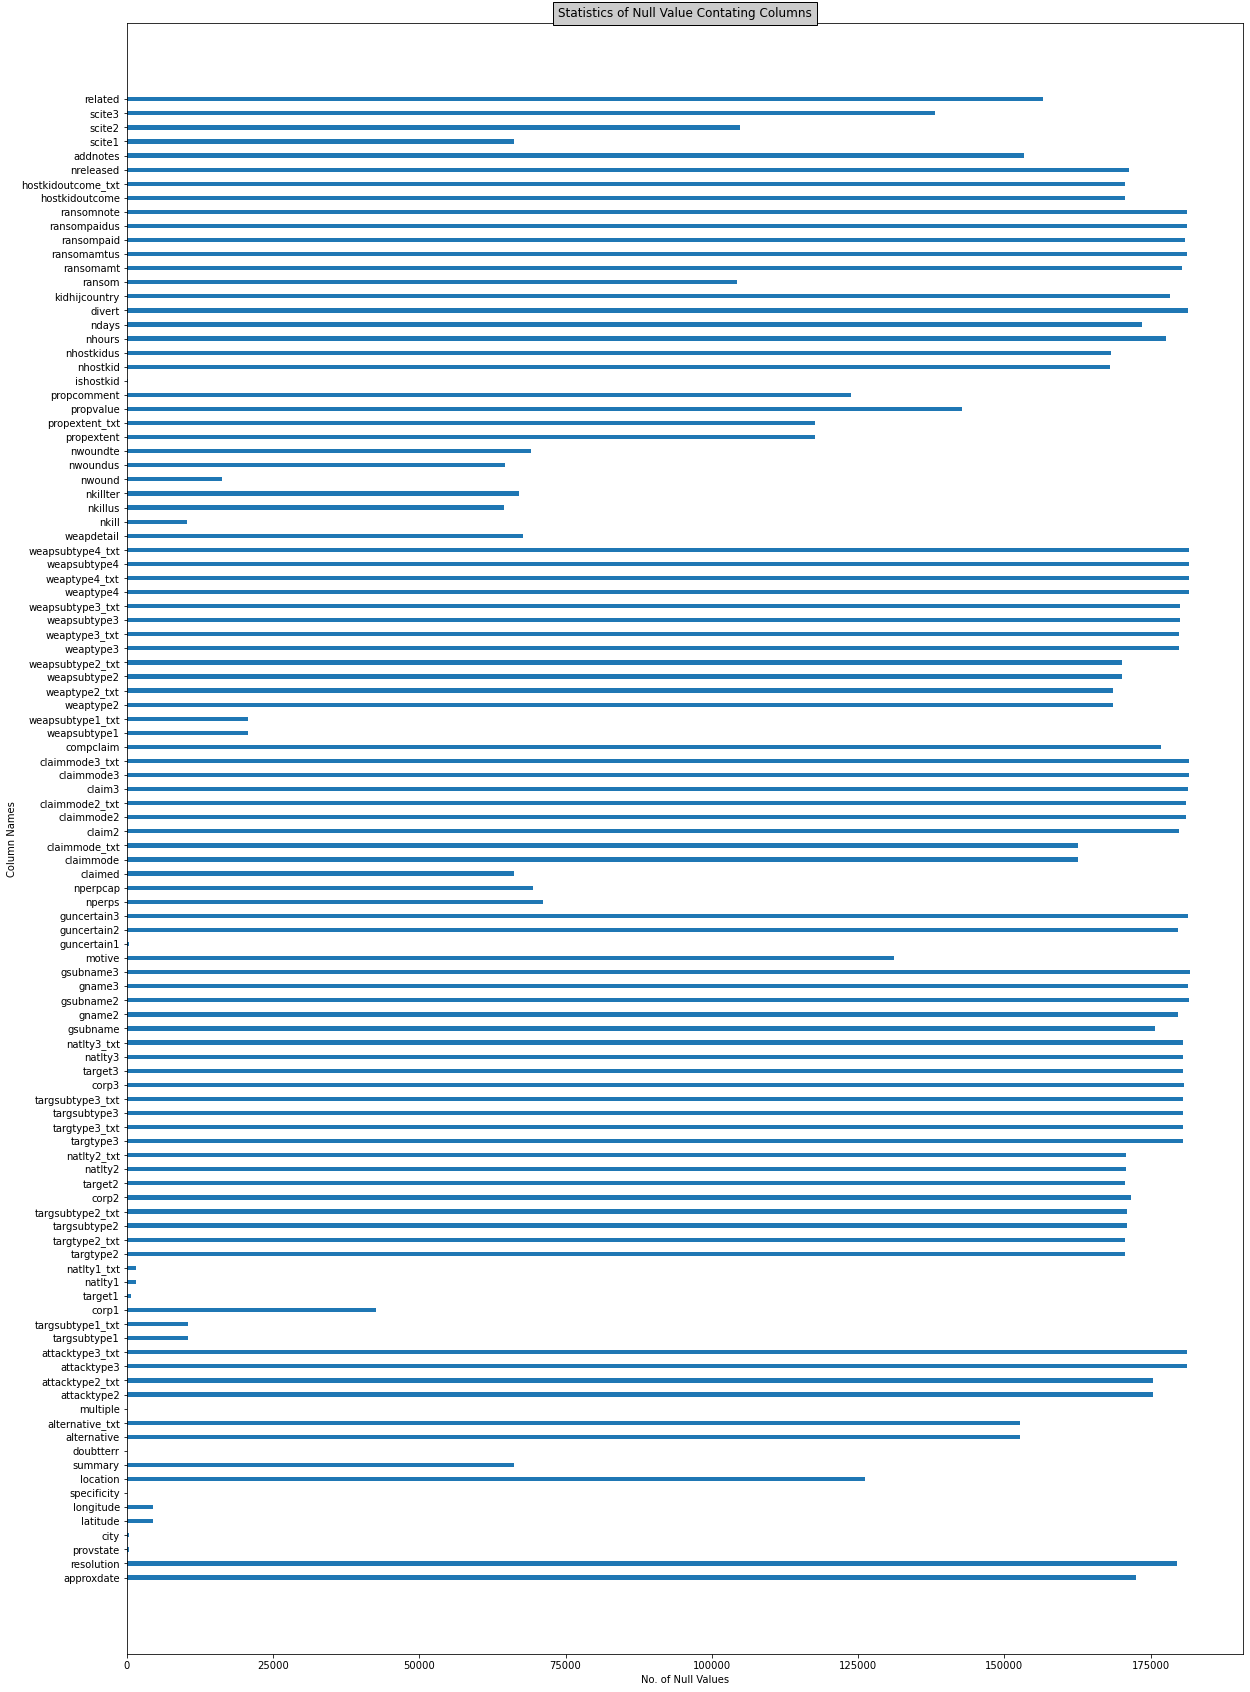

In [3]:
# plot the null value statistics from the columns
import matplotlib.pyplot as plt 
x =  col_stats[col_stats.iloc[:, 2] != 0].iloc[:, 1]
y =  col_stats[col_stats.iloc[:, 2] != 0].iloc[:, 2]
plt.figure(figsize = (20, 30))
plt.barh(x, y, .3)
plt.title('Statistics of Null Value Contating Columns', bbox={'facecolor':'0.8', 'pad':5}, loc = 'center')
plt.ylabel('Column Names')
plt.xlabel('No. of Null Values')
plt.show()

In [4]:
# find the groups those who did 5 or more attacks
groups = list(df['gname'].unique())
print("Discarded Group Names:")
for i in groups:
    if len(df[df['gname'] == i]) < 5:
        print(i)
        df = df[df['gname'] != i].copy()
df

Discarded Group Names:
MANO-D
New Year's Gang
Commune 1
Armed Forces of National Liberation- Venezuela (FALN)
1st of May Group
Revolutionary Force 9
Puerto Rican Resistance Movement
Dominican Popular Movement (MPD)
Argentine National Organization Movement (MANO)
Saor Eire (Irish Republican Group)
The World United Formosans for Independence (WUFI)
Revolutionary Force 26
Black Afro Militant Movement
Stop the War Coalition
Kabataang Makabayan (KM)
National Committee to Combat Fascism
Seattle Liberation Front
Ejercito de Liberacion Nacional (Bolivia)
American Servicemen's Union (ASU)
SFT
Jonathan Jackson Brigade
White Panther Party
Revolutionary Action Party
Siah KAL
Front de Liberation du Quebec (FLQ)
Quartermoon Society
Students for a Democratic Society (SDS) (German)
Socialist Patients' Collective (SPK)
Revolutionary Committee of Mozambique (COREMO)
Tony El Pelou Band
BAY Bombers
Movement of the Revolutionary Left (MIR) (Venezuela)
Black Cells
RYF
Black Revolutionary Assault Team
People

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
# label encode countries
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['country'] = enc.fit_transform(df['country'])

In [6]:
# create a dictionary of country names from the dataset
country_dict = {}
for i in range(len(df)):
    country_dict.update({df.iloc[i, list(df.columns).index('country')]: df.iloc[i, list(df.columns).index('country_txt')]})

In [7]:
# label encode gnames
gnames = list(df['gname'].copy())
df['gname'] = enc.fit_transform(df['gname'])

In [8]:
# create a dictionary of gnames from the dataset
gname_dict = {}
for i in range(len(gnames)):
    gname_dict.update({df.iloc[i, list(df.columns).index('gname')]: gnames[i]})

<h2><a id='division_ID3'>Feature Extraction</a></h2>

[MENU](#division_ID0)

In [9]:
# filter most nessecary columns
terror = df[['iyear', 'crit1', 'crit2', 'crit3', 'doubtterr', 'country', 'attacktype1', 
             'weaptype1', 'targtype1', 'gname', 'individual']].copy()
terror

,iyear,crit1,crit2,crit3,doubtterr,country,attacktype1,weaptype1,targtype1,gname,individual
1,1970,1,1,1,0.0,110,6,13,7,4,0
2,1970,1,1,1,0.0,130,1,13,10,911,0
3,1970,1,1,1,0.0,64,3,6,7,911,0
4,1970,1,1,1,-9.0,85,7,8,7,911,0
5,1970,1,1,1,0.0,169,2,5,3,177,0
...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,1,1,0,1.0,145,2,5,4,48,0
181687,2017,1,1,0,1.0,156,3,6,4,580,0
181688,2017,1,1,1,0.0,130,7,8,14,162,0
181689,2017,1,1,1,0.0,76,3,6,2,911,0


In [10]:
# check null values in the existing dataframe
terror.isnull().sum()

iyear          0
crit1          0
crit2          0
crit3          0
doubtterr      1
country        0
attacktype1    0
weaptype1      0
targtype1      0
gname          0
individual     0
dtype: int64

In [11]:
# drop all null values in the existing dataframe
terror.dropna(inplace = True)

In [12]:
# change the columns datatypes into integer
for i in terror.columns:
    terror[i] = terror[i].astype(int)

<h2><a id='division_ID4'>Data Visualization</a></h2>

[MENU](#division_ID0)

In [13]:
# lets have a look on dataset
terror

,iyear,crit1,crit2,crit3,doubtterr,country,attacktype1,weaptype1,targtype1,gname,individual
1,1970,1,1,1,0,110,6,13,7,4,0
2,1970,1,1,1,0,130,1,13,10,911,0
3,1970,1,1,1,0,64,3,6,7,911,0
4,1970,1,1,1,-9,85,7,8,7,911,0
5,1970,1,1,1,0,169,2,5,3,177,0
...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,1,1,0,1,145,2,5,4,48,0
181687,2017,1,1,0,1,156,3,6,4,580,0
181688,2017,1,1,1,0,130,7,8,14,162,0
181689,2017,1,1,1,0,76,3,6,2,911,0


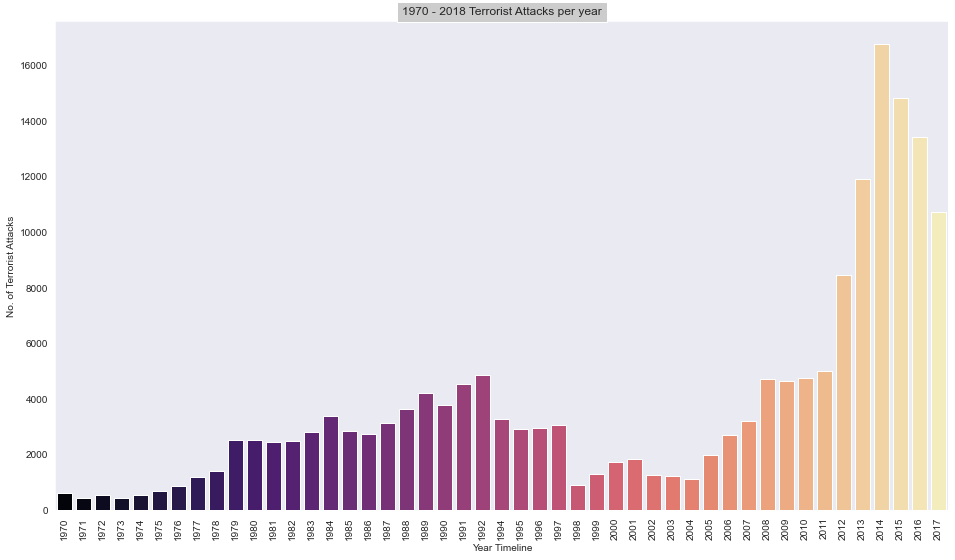

In [14]:
# year wise terrorist attack plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("rocket", as_cmap=True)
sns.set_style('dark')
timeline = terror['iyear'].unique()
attacks = []
for i in timeline:
    attacks.append(len(terror[terror['iyear'] == i]))
plt.figure(figsize = (16, 9))
plt.title("1970 - 2018 Terrorist Attacks per year", bbox={'facecolor':'0.8', 'pad':5}, loc = 'center')
sns.barplot(y = attacks, x = timeline, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Year Timeline')
plt.ylabel('No. of Terrorist Attacks')
plt.show()

In [15]:
# top 20 countries where terrorist attacks happened in last 50 years
areas = terror['country'].unique()
con_attacks = []
for i in areas:
    con_attacks.append(len(terror[terror.iloc[:, list(terror.columns).index('country')] == i]))
for i in range(len(con_attacks) - 1):
    for j in range(len(con_attacks) - i - 1):
        if con_attacks[j] <= con_attacks[j+1]:
            temp = con_attacks[j]
            con_attacks[j] = con_attacks[j+1]
            con_attacks[j+1] = temp
            temp = areas[j]
            areas[j] = areas[j+1]
            areas[j+1] = temp
con_attacks = con_attacks[: 20]
areas = areas[: 20]
print(con_attacks)
print(areas)

[24543, 14268, 12710, 11683, 8219, 6850, 6082, 5292, 5167, 4224, 4106, 3835, 3818, 3290, 3173, 2993, 2714, 2597, 2552, 2452]
[ 79 124   0  76  35 130 129  49 193 164 145 122 161 176 148 149   2 169
  56  48]


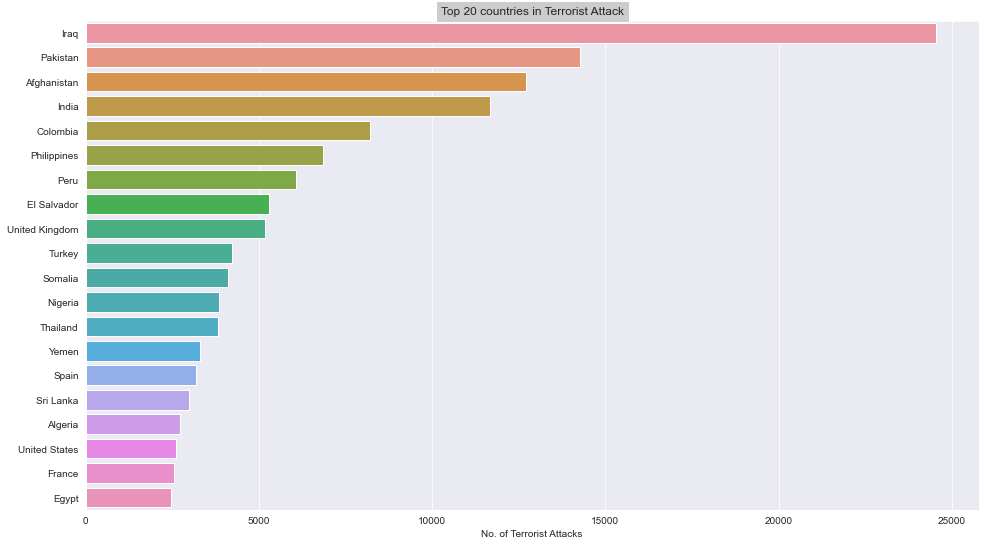

In [16]:
# change the country numbers with country names from the GTD codebook
country = ['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines', 'Peru', 'El Salvador', 'United Kingdom',
          'Turkey', 'Somalia', 'Nigeria', 'Thailand', 'Yemen', 'Spain', 'Sri Lanka', 'Algeria', 'United States', 'France', 'Egypt']
sns.color_palette("flare", as_cmap=True)
sns.set_style("darkgrid")
plt.figure(figsize = (16, 9))
plt.title("Top 20 countries in Terrorist Attack", bbox={'facecolor':'0.8', 'pad':5}, loc = 'center')
sns.barplot(x = con_attacks, y = country)
plt.xlabel("No. of Terrorist Attacks")
plt.show()

In [17]:
# top 20 terrorist groups 
terrorist_groups = terror['gname'].unique()
top_groups = []
for i in terrorist_groups:
    top_groups.append(len(terror[terror.iloc[:, list(terror.columns).index('gname')] == i]))
for i in range(len(top_groups) - 1):
    for j in range(len(top_groups) - i - 1):
        if top_groups[j] <= top_groups[j+1]:
            temp = top_groups[j]
            top_groups[j] = top_groups[j+1]
            top_groups[j+1] = temp
            temp = terrorist_groups[j]
            terrorist_groups[j] = terrorist_groups[j+1]
            terrorist_groups[j+1] = temp
terrorist_groups = terrorist_groups[1: 21]
top_groups = top_groups[1: 21]
gnames = []
for i in terrorist_groups:
     gnames.append(gname_dict[i])
print(top_groups)
print(gnames)

[7478, 5613, 4555, 3351, 3288, 2772, 2671, 2487, 2418, 2310, 2024, 1878, 1630, 1606, 1561, 1351, 1125, 1062, 1020, 895]
['Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)', 'Al-Shabaab', "New People's Army (NPA)", 'Irish Republican Army (IRA)', 'Revolutionary Armed Forces of Colombia (FARC)', 'Boko Haram', "Kurdistan Workers' Party (PKK)", 'Basque Fatherland and Freedom (ETA)', 'Communist Party of India - Maoist (CPI-Maoist)', 'Maoists', 'Liberation Tigers of Tamil Eelam (LTTE)', 'National Liberation Army of Colombia (ELN)', 'Tehrik-i-Taliban Pakistan (TTP)', 'Palestinians', 'Houthi extremists (Ansar Allah)', 'Al-Qaida in the Arabian Peninsula (AQAP)', 'Nicaraguan Democratic Force (FDN)']


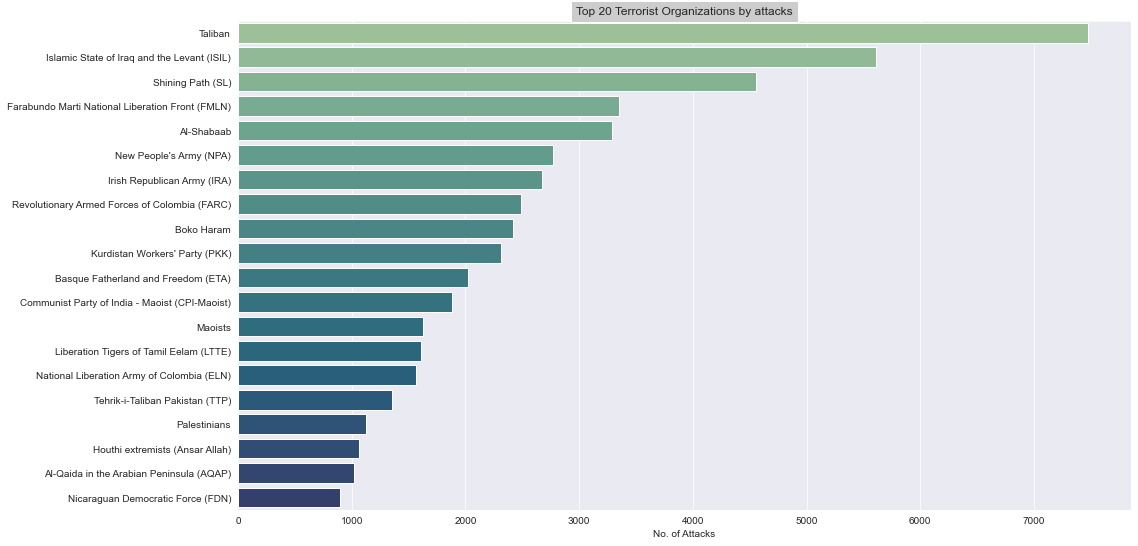

In [18]:
# plot no. of attacks by top 20 terrorist organizations
plt.figure(figsize = (16, 9))
plt.title("Top 20 Terrorist Organizations by attacks", bbox={'facecolor':'0.8', 'pad':5}, loc = 'center')
sns.barplot(x = top_groups, y = gnames, palette = "crest")
plt.xlabel("No. of Attacks")
plt.show()

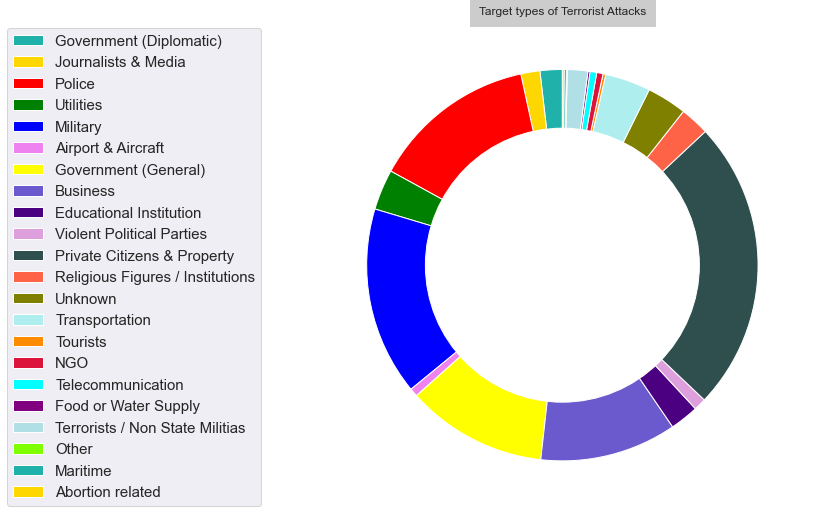

In [19]:
# terrorist attack target types
types = list(terror['targtype1'].unique())
freq = []
for i in types:
    freq.append(len(terror[terror.iloc[:, list(terror.columns).index('targtype1')] == i]))

type_names = {
    1: 'Business',
    2: 'Government (General)',
    3: 'Police',
    4: 'Military',
    5: 'Abortion related',
    6: 'Airport & Aircraft',
    7: 'Government (Diplomatic)',
    8: 'Educational Institution',
    9: 'Food or Water Supply',
    10: 'Journalists & Media',
    11: 'Maritime',
    12: 'NGO',
    13: 'Other',
    14: 'Private Citizens & Property',
    15: 'Religious Figures / Institutions',
    16: 'Telecommunication',
    17: 'Terrorists / Non State Militias',
    18: 'Tourists',
    19: 'Transportation',
    20: 'Unknown',
    21: 'Utilities',
    22: 'Violent Political Parties'
}

for i in types:
    types[types.index(i)] = type_names[i]

colors = ['lightseagreen', 'gold', 'red', 'green', 'blue', 'violet', 'yellow', 'slateblue', 'indigo', 'plum',
         'darkslategray', 'tomato', 'olive', 'paleturquoise', 'darkorange', 'crimson', 'cyan', 'purple', 'powderblue', 'chartreuse']
plt.figure(figsize = (16, 9))
plt.title('Target types of Terrorist Attacks', bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
plt.pie(freq, startangle=90, colors = colors)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(types, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)
plt.show()

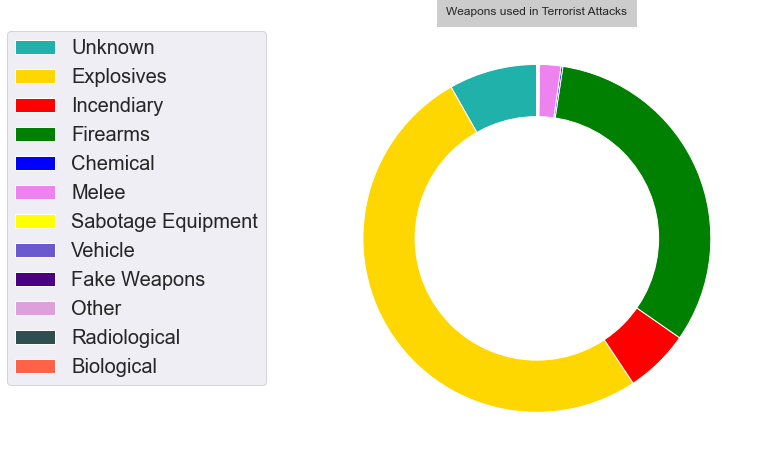

In [20]:
# terrorist weapon types
weaps = list(terror['weaptype1'].unique())
freq = []
for i in weaps:
    freq.append(len(terror[terror.iloc[:, list(terror.columns).index('weaptype1')] == i]))

type_weaps = {
    1: 'Biological',
    2: 'Chemical',
    3: 'Radiological',
    4: 'Nuclear',
    5: 'Firearms',
    6: 'Explosives',
    7: 'Fake Weapons',
    8: 'Incendiary',
    9: 'Melee',
    10: 'Vehicle',
    11: 'Sabotage Equipment',
    12: 'Other',
    13: 'Unknown'
}

for i in weaps:
    weaps[weaps.index(i)] = type_weaps[i]

colors = ['lightseagreen', 'gold', 'red', 'green', 'blue', 'violet', 'yellow', 'slateblue', 'indigo', 'plum',
         'darkslategray', 'tomato', 'olive']
plt.figure(figsize = (14, 8))
plt.title('Weapons used in Terrorist Attacks', bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
plt.pie(freq, startangle=90, colors = colors)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(weaps, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=20)
plt.show()

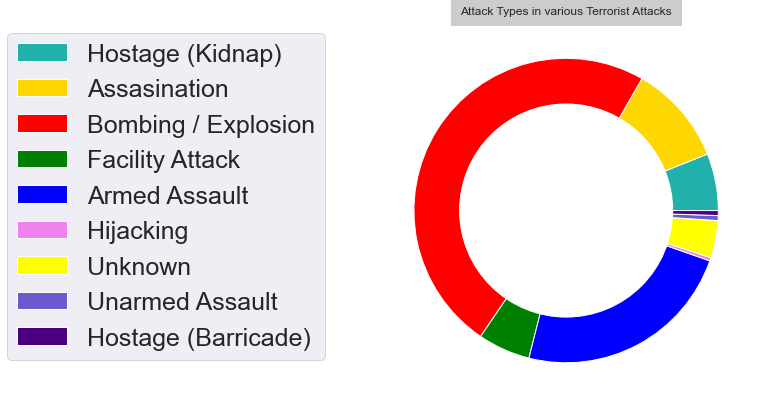

In [21]:
# terrorist attack types
attacks = list(terror['attacktype1'].unique())
freq = []
for i in attacks:
    freq.append(len(terror[terror.iloc[:, list(terror.columns).index('attacktype1')] == i]))

type_attacks = {
    1: 'Assasination',
    2: 'Armed Assault',
    3: 'Bombing / Explosion',
    4: 'Hijacking',
    5: 'Hostage (Barricade)',
    6: 'Hostage (Kidnap)',
    7: 'Facility Attack',
    8: 'Unarmed Assault',
    9: 'Unknown'
}

for i in attacks:
    attacks[attacks.index(i)] = type_attacks[i]

colors = ['lightseagreen', 'gold', 'red', 'green', 'blue', 'violet', 'yellow', 'slateblue', 'indigo']
plt.figure(figsize = (12, 7))
plt.title('Attack Types in various Terrorist Attacks', bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
plt.pie(freq, colors = colors)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(attacks, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=25)
plt.show()    

<AxesSubplot:title={'center':'Terrorist Attack Hot Zone'}>

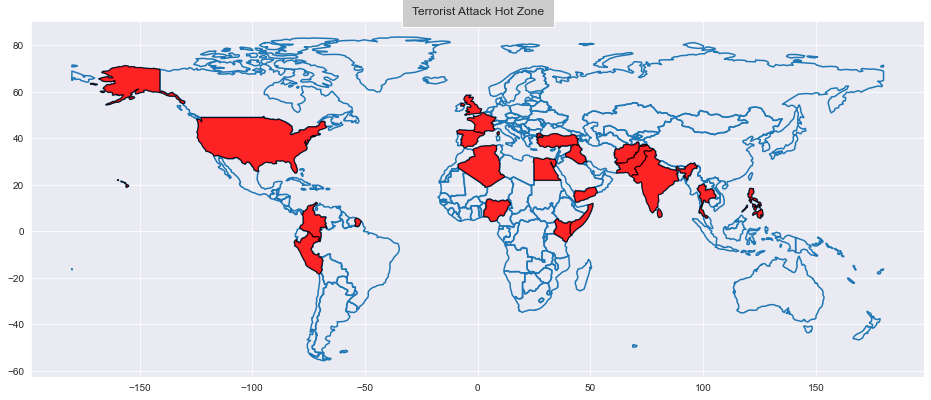

In [22]:
# plot terrorist attack hot zone
import geopandas
from descartes import PolygonPatch

def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))
    
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world.continent != 'Antarctica']
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_title("Terrorist Attack Hot Zone",  bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')

country = ['Iraq', 'Pakistan', 'India', 'Afghanistan', 'Colombia', 'Philippines', 'Peru', 'United Kingdom', 'Turkey', 'Somalia',
          'Kenya', 'Nigeria', 'Thailand', 'Yemen', 'Spain', 'Sri Lanka', 'Algeria', 'United States of America', 'France', 'Egypt']

for i in range(len(country)):
    plotCountryPatch(ax, country[i], 'red')
stats = pd.DataFrame(con_attacks, columns = ['attacks'])
world.boundary.plot(ax = ax)

<h2><a id='division_ID5'>Model Training</a></h2>

[MENU](#division_ID0)

In [23]:
# extract dependent and independent features
x1 = terror.drop(['country'], axis = 1)
y1 = terror.iloc[:, 5]
x2 = terror.drop(['gname'], axis = 1)
y2 = terror.iloc[:, -2]
x3 = terror.drop(['attacktype1'], axis = 1)
y3 = terror.iloc[:, 6]
x4 = terror.drop(['weaptype1'], axis = 1)
y4 = terror.iloc[:, 7]
x5 = terror.drop(['targtype1'], axis = 1)
y5 = terror.iloc[:, -3]

In [24]:
# apply train test split
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 60) # for country
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 60) # for gnames
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 60) # for attacktype
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.2, random_state = 60) # for weapontype
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.2, random_state = 60) # for targettype

In [25]:
# import nessecary algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier

 - <h3><b>Prediction Model for Target Country</b></h3>

In [26]:
# apply decision tree classifier
dtc_model1 = DecisionTreeClassifier()
dtc_model1.fit(x1_train, y1_train)
dtc_model1_pred = dtc_model1.predict(x1_test)
m1s1 = dtc_model1.score(x1_test, y1_test)

In [27]:
# apply random forest classifier
rfc_model1 = RandomForestClassifier(n_estimators = 10)
rfc_model1.fit(x1_train, y1_train)
rfc_model1_pred = rfc_model1.predict(x1_test)
m1s2 = rfc_model1.score(x1_test, y1_test)

 - <h3><b>Prediction Model for Terrorist Group Name</b></h3>

In [28]:
# apply decision tree classifier
dtc_model2 = DecisionTreeClassifier()
dtc_model2.fit(x2_train, y2_train)
dtc_model2_pred = dtc_model2.predict(x2_test)
m2s1 = dtc_model2.score(x2_test, y2_test)

In [29]:
# apply random forest classifier
rfc_model2 = RandomForestClassifier(n_estimators = 10)
rfc_model2.fit(x2_train, y2_train)
rfc_model2_pred = rfc_model2.predict(x2_test)
m2s2 = rfc_model2.score(x2_test, y2_test)

 - <h3><b>Prediction Model for Terrorist Attack Type</b></h3>

In [30]:
# apply decision tree classifier
dtc_model3 = DecisionTreeClassifier()
dtc_model3.fit(x3_train, y3_train)
dtc_model3_pred = dtc_model3.predict(x3_test)
m3s1 = dtc_model3.score(x3_test, y3_test)

In [31]:
# apply random forest classifier
rfc_model3 = RandomForestClassifier(n_estimators = 10)
rfc_model3.fit(x3_train, y3_train)
rfc_model3_pred = rfc_model3.predict(x3_test)
m3s2 = rfc_model3.score(x3_test, y3_test)

 - <h3><b>Prediction Model for Terrorist Attack Weapon Type</b></h3>

In [32]:
# apply decision tree classifier
dtc_model4 = DecisionTreeClassifier()
dtc_model4.fit(x4_train, y4_train)
dtc_model4_pred = dtc_model4.predict(x4_test)
m4s1 = dtc_model4.score(x4_test, y4_test)

In [33]:
# apply random forest classifier
rfc_model4 = RandomForestClassifier(n_estimators = 10)
rfc_model4.fit(x4_train, y4_train)
rfc_model4_pred = rfc_model4.predict(x4_test)
m4s2 = rfc_model4.score(x4_test, y4_test)

 - <h3><b>Prediction Model for Terrorist Attack Target Type</b></h3>

In [34]:
# apply decision tree classifier
dtc_model5 = DecisionTreeClassifier()
dtc_model5.fit(x5_train, y5_train)
dtc_model5_pred = dtc_model5.predict(x5_test)
m5s1 = dtc_model5.score(x5_test, y5_test)

In [35]:
# apply random forest classifier
rfc_model5 = RandomForestClassifier(n_estimators = 10)
rfc_model5.fit(x5_train, y5_train)
rfc_model5_pred = rfc_model5.predict(x5_test)
m5s2 = rfc_model5.score(x5_test, y5_test)

<h2><a id='division_ID6'>Model Evaluation</a></h2>

[MENU](#division_ID0)

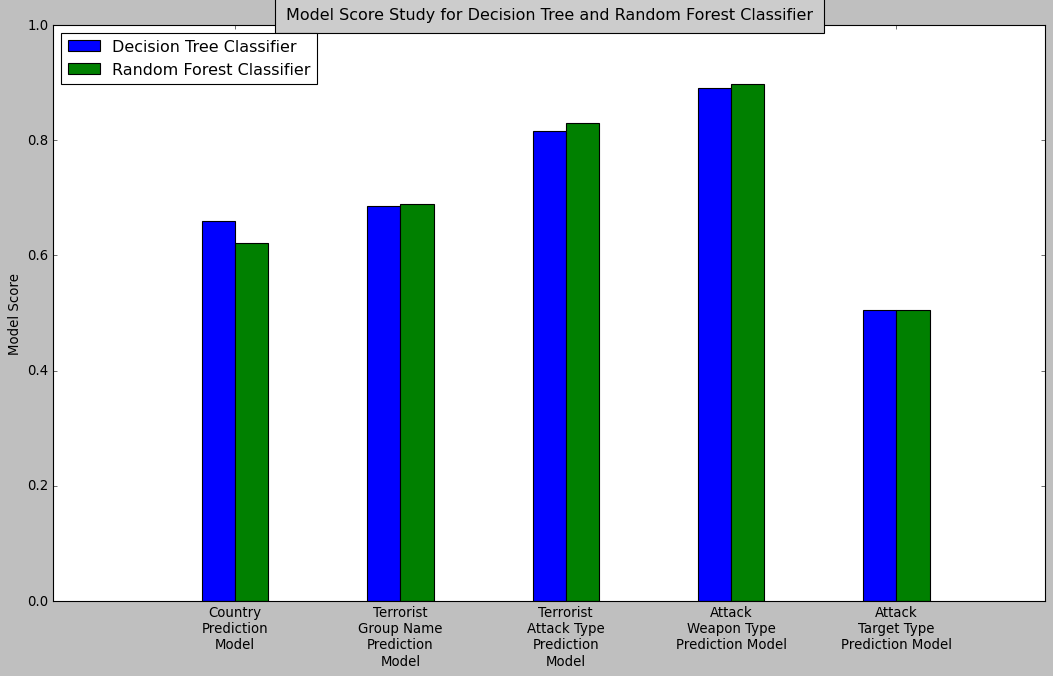

In [36]:
# plot a bar graph to check scores of every model
import numpy as np
from matplotlib import style
style.use('classic')

r = np.arange(5)
w = .2

algo = ['Decision Tree Classifier', 'Random Forest Classifier']
plt.figure(figsize = (16, 9))
models = ['Country\nPrediction\nModel', 'Terrorist\nGroup Name\nPrediction\nModel', 
          'Terrorist\nAttack Type\nPrediction\nModel', 'Attack\nWeapon Type\nPrediction Model',
         'Attack\nTarget Type\nPrediction Model']

plt.bar(r, [m1s1, m2s1, m3s1, m4s1, m5s1], width = w)
plt.bar(r+w, [m1s2, m2s2, m3s2, m4s2, m5s2], width = w)
plt.xticks(r+w/2, models)
plt.ylim(0, 1)
plt.ylabel('Model Score')
plt.title("Model Score Study for Decision Tree and Random Forest Classifier",  bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
plt.legend(algo, loc = 2)

 - <h3><b>Evaluation of Terrorist Attack Country Prediction Model</b></h3>

In [37]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y1_test, dtc_model1_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      2513
           1       0.00      0.00      0.00        19
           2       0.62      0.69      0.65       554
           4       0.90      0.86      0.88       109
           6       0.41      0.44      0.42       147
           7       0.00      0.00      0.00         4
           8       0.13      0.18      0.15        22
           9       0.36      0.19      0.24        27
          10       0.22      0.18      0.20        11
          11       1.00      0.00      0.00         1
          12       0.38      0.27      0.32        33
          13       0.59      0.54      0.57       315
          14       0.50      1.00      0.67         1
          15       0.50      0.31      0.38        26
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          19       0.10      0.14      0.12        36
          20       0.09    

In [38]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, dtc_model1_pred)

array([[1665,    0,    4, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   4,    1,  381, ...,    0,    1,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    6,    0],
       [   0,    0,    0, ...,    0,    0,   24]], dtype=int64)

 - <h3><b>Evaluation of Terrorist Group Name Prediction Model</b></h3>

In [39]:
# classification report
print(classification_report(y2_test, rfc_model2_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.75      0.60         4
           2       0.00      1.00      0.00         0
           3       0.25      0.33      0.29         3
           4       0.42      0.83      0.56         6
           5       1.00      0.00      0.00         3
           6       0.67      0.67      0.67         3
           7       0.25      0.33      0.29         3
           8       0.50      1.00      0.67         1
           9       1.00      0.00      0.00         1
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         2
          12       0.11      0.12      0.12         8
          13       1.00      0.00      0.00         1
          14       0.45      0.28      0.35       106
          15       1.00      0.00      0.00         2
          16       1.00      0.00      0.00         4
          17       0.09    

In [40]:
# confusion matrix
confusion_matrix(y2_test, rfc_model2_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

 - <h3><b>Evaluation of Terrorist Attack Type Prediction Model</b></h3>

In [41]:
# classification report
print(classification_report(y3_test, rfc_model3_pred, zero_division = 1))

              precision    recall  f1-score   support

           1       0.64      0.53      0.58      3755
           2       0.76      0.82      0.79      8375
           3       0.94      0.98      0.96     17360
           4       0.41      0.21      0.28       108
           5       0.58      0.31      0.40       208
           6       0.56      0.42      0.48      2208
           7       0.80      0.82      0.81      1900
           8       0.65      0.50      0.57       213
           9       0.70      0.75      0.72      1404

    accuracy                           0.83     35531
   macro avg       0.67      0.59      0.62     35531
weighted avg       0.82      0.83      0.82     35531



In [42]:
# confusion matrix
confusion_matrix(y3_test, rfc_model3_pred)

array([[ 1981,   964,   550,     2,     3,   131,    29,    16,    79],
       [  615,  6846,   366,    16,    21,   265,   203,    25,    18],
       [  157,   174, 16952,     3,     7,    10,    30,     1,    26],
       [   10,    43,     8,    23,     1,    13,     4,     1,     5],
       [   16,    63,    22,     1,    65,    20,    16,     0,     5],
       [  180,   670,    61,     7,     6,   921,    66,    10,   287],
       [   36,   192,    16,     3,     5,    54,  1560,     5,    29],
       [   23,    40,     2,     0,     0,    15,    26,   107,     0],
       [   73,     8,    13,     1,     5,   228,    24,     0,  1052]],
      dtype=int64)

 - <h3><b>Evaluation of Terrorist Attack Weapon Type Prediction Model</b></h3>

In [43]:
# classification report
print(classification_report(y4_test, rfc_model4_pred, zero_division = 1))

              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.53      0.42      0.47        60
           3       0.67      1.00      0.80         2
           5       0.85      0.90      0.87     11548
           6       0.96      0.96      0.96     18109
           7       1.00      0.00      0.00         5
           8       0.85      0.82      0.83      2096
           9       0.55      0.38      0.45       709
          10       0.74      0.74      0.74        23
          11       0.52      0.48      0.50        23
          12       0.71      0.21      0.32        24
          13       0.79      0.73      0.76      2927

    accuracy                           0.90     35531
   macro avg       0.76      0.57      0.59     35531
weighted avg       0.90      0.90      0.90     35531



In [44]:
# confusion matrix
confusion_matrix(y4_test, rfc_model4_pred)

array([[    1,     2,     0,     0,     0,     0,     0,     1,     0,
            0,     0,     1],
       [    0,    25,     0,     4,    16,     0,     6,     9,     0,
            0,     0,     0],
       [    0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0, 10369,   477,     0,   165,   121,     0,
            1,     2,   413],
       [    0,     0,     0,   715, 17324,     0,     9,    16,     0,
            0,     0,    45],
       [    0,     1,     0,     1,     2,     0,     0,     0,     0,
            0,     0,     1],
       [    0,     3,     0,   258,    47,     0,  1718,    26,     1,
            8,     0,    35],
       [    0,    14,     1,   308,    13,     0,    48,   271,     3,
            0,     0,    51],
       [    0,     0,     0,     0,     2,     0,     2,     2,    17,
            0,     0,     0],
       [    0,     0,     0,     2,     0,     0,     9,     0,     0,
           11,     0

 - <h3><b>Evaluation of Terrorist Attack Target Type Prediction Model</b></h3>

In [45]:
# classification report
print(classification_report(y5_test, rfc_model5_pred, zero_division = 1))

              precision    recall  f1-score   support

           1       0.47      0.40      0.43      4075
           2       0.40      0.39      0.40      4131
           3       0.43      0.45      0.44      4882
           4       0.93      0.83      0.88      5534
           5       0.77      0.90      0.83        52
           6       0.38      0.25      0.31       236
           7       0.33      0.24      0.28       680
           8       0.31      0.17      0.22       804
           9       0.25      0.05      0.08        63
          10       0.26      0.17      0.21       539
          11       0.39      0.21      0.28        61
          12       0.15      0.09      0.11       175
          13       0.14      0.04      0.06        27
          14       0.47      0.67      0.55      8527
          15       0.31      0.14      0.20       844
          16       0.33      0.16      0.22       204
          17       0.50      0.23      0.31       593
          18       0.15    

In [46]:
# confusion matrix
confusion_matrix(y5_test, rfc_model5_pred)

array([[1625,  337,  357,   45,    3,   16,   42,   44,    1,   29,    3,
           9,    1, 1206,   33,   18,    8,    5,   89,   69,  126,    9],
       [ 348, 1629,  540,   54,    4,   14,   63,   53,    0,   69,    3,
          19,    0,  934,   57,   16,   21,    7,   81,   71,  115,   33],
       [ 289,  480, 2177,   69,    1,   12,   22,   25,    0,   35,    1,
          11,    1, 1372,   33,    3,   11,   11,   80,  157,   84,    8],
       [  47,  120,  255, 4606,    0,    3,   14,    8,    0,    8,    1,
           3,    1,  369,    6,    1,   12,    1,   22,   38,   15,    4],
       [   0,    2,    1,    0,   47,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    2,    0,    0,    0,    0,    0,    0,    0],
       [  35,   26,   24,    2,    1,   60,   22,    5,    0,    7,    0,
           1,    0,   29,    4,    0,    0,    0,    8,    1,   11,    0],
       [  69,  108,   59,    8,    1,   19,  161,    7,    0,   18,    2,
          16,    0,  149,   13, 

<h2><a id='division_ID7'>Model Testing</a></h2>

[MENU](#division_ID0)

In [47]:
iyear = 2012
crit1 = 1
crit2 = 1
crit3 = 1
doubtterr = 0
country = 92
attacktype1 = 3 
weaptype1 = 6
targtype1 =  4
gname = 911
individual = 0

 - <h3><b>Customized I/O for Terrorist Attack Country Prediction Model</b></h3>

In [48]:
val = dtc_model1.predict([[iyear, crit1, crit2, crit3, doubtterr, attacktype1, weaptype1, targtype1, gname, individual]])
val = int(val[0])
if val in country_dict.keys():
    print("Country Name: ", country_dict[val])
else:
    print("Country Name: Unknown")

Country Name:  Iraq


 - <h3><b>Customized I/O for Terrorist Group Name Prediction Model</b></h3>

In [49]:
val = rfc_model2.predict([[iyear, crit1, crit2, crit3, doubtterr, country, attacktype1, weaptype1, targtype1, individual]])
val = int(val[0])
if val in gname_dict.keys():
    print("Group Name: ", gname_dict[val])
else:
    print("Group Name: Unknown")

Group Name:  Unknown


 - <h3><b>Customized I/O for Terrorist Attack Type Prediction Model</b></h3>

In [50]:
val = rfc_model3.predict([[iyear, crit1, crit2, crit3, doubtterr, country, weaptype1, targtype1, gname, individual]])
val = int(val[0])
if val in type_attacks.keys():
    print("Attack Type: ", type_attacks[val])
else:
    print("Attack Type: Unknown")

Attack Type:  Bombing / Explosion


 - <h3><b>Customized I/O for Terrorist Attack Weapon Type Prediction Model</b></h3>

In [51]:
val = rfc_model4.predict([[iyear, crit1, crit2, crit3, doubtterr, country, attacktype1, targtype1, gname, individual]])
val = int(val[0])
if val in type_weaps.keys():
    print("Weapon Type: ", type_weaps[val])
else:
    print("Weapon Type: Unknown")

Weapon Type:  Explosives


 - <h3><b>Customized I/O for Terrorist Attack Target Type Prediction Model</b></h3>

In [52]:
val = rfc_model4.predict([[iyear, crit1, crit2, crit3, doubtterr, country, weaptype1, attacktype1, gname, individual]])
val = int(val[0])
if val in type_names.keys():
    print("Target Type: ", type_names[val])
else:
    print("Target Type: Unknown")

Target Type:  Abortion related


<h2><a id='division_ID8'>Model Saving</a></h2> 

[MENU](#division_ID0)

In [53]:
# save these 4 models for future prediction
import joblib
joblib.dump(dtc_model1, 'GT_Country_Prediction')
joblib.dump(rfc_model2, 'GT_Gname_Prediction')
joblib.dump(rfc_model3, 'GT_Attacktype_Prediction')
joblib.dump(rfc_model4, 'GT_Weapontype_Prediction')
joblib.dump(rfc_model5, 'GT_Targettype_Prediction')

['GT_Targettype_Prediction']

<h2><a id='division_ID9'>User Interactive</a></h2> 

[MENU](#division_ID0)

In [54]:
def usr_choice(choice):
    arr = []
    arr.append(int(input('Year: ')))
    arr.append(int(input('Criteria 1 [0/1]: ')))
    arr.append(int(input('Criteria 2 [0/1]: ')))
    arr.append(int(input('Criteria 3 [0/1]: ')))
    arr.append(int(input('Doubt [0/1]: ')))
    if choice != 1:
        arr.append(int(input('Country [Only Country Code is accepted]: ')))
    if choice != 2:
        arr.append(int(input('Terrorist Group [Only Group Code is accepted]: ')))
    if choice != 3:
        arr.append(int(input('Attack Type [Only Attack Code is accepted]: ')))
    if choice != 4: 
        arr.append(int(input('Weapon Type [Only Weapon Code is accepted]: ')))
    if choice != 5:
        arr.append(int(input('Target Type [Only Target Code is accepted]: ')))
    arr.append(int(input('Individual [0/1]: ')))
    return arr
    

while True:
    print('<<<  GLOBAL TERRORISM PREDICTION PROJECT   >>>')
    print('Press 0 ---> Exit')
    print('Press 1 ---> Predict Target Country')
    print('Press 2 ---> Predict Terrorist Group Name')
    print('Press 3 ---> Predict Terrorist Attack Type')
    print('Press 4 ---> Predict Terrorist Weapon Type')
    print('Press 5 ---> Predict Terrorist Attack Target Type')
    ch = int(input('Enter your choice: '))
    if ch == 0:
        print('UI is closed!')
        break
    elif ch == 1:
        model = joblib.load('GT_Country_Prediction')
        val = model.predict([usr_choice(ch)])
        val = int(val[0])
        if val in country_dict.keys():
            print("Country Name: ", country_dict[val])
        else:
            print("Country Name: Unknown")
        
    elif ch == 2:
        model = joblib.load('GT_Gname_Prediction')
        val = model.predict([usr_choice(ch)])
        val = int(val[0])
        if val in gname_dict.keys():
            print("Group Name: ", gname_dict[val])
        else:
            print("Group Name: Unknown")
    
    elif ch == 3:
        model = joblib.load('GT_Attacktype_Prediction')
        val = model.predict([usr_choice(ch)])
        val = int(val[0])
        if val in type_attacks.keys():
            print("Attack Type: ", type_attacks[val])
        else:
            print("Attack Type: Unknown")
    
    elif ch == 4:
        model = joblib.load('GT_Weapontype_Prediction')
        val = model.predict([usr_choice(ch)])
        val = int(val[0])
        if val in type_weaps.keys():
            print("Weapon Type: ", type_weaps[val])
        else:
            print("Weapon Type: Unknown")
    
    elif ch == 5:
        model = joblib.load('GT_Targettype_Prediction')
        val = model.predict([usr_choice(ch)])
        val = int(val[0])
        if val in type_names.keys():
            print("Target Type: ", type_names[val])
        else:
            print("Target Type: Unknown")
    
    else:
        print('You select a wrong choice :(')
    print('----------------------------------------------------------------------')

<<<  GLOBAL TERRORISM PREDICTION PROJECT   >>>
Press 0 ---> Exit
Press 1 ---> Predict Target Country
Press 2 ---> Predict Terrorist Group Name
Press 3 ---> Predict Terrorist Attack Type
Press 4 ---> Predict Terrorist Weapon Type
Press 5 ---> Predict Terrorist Attack Target Type
Enter your choice: 1
Year: 2011
Criteria 1 [0/1]: 1
Criteria 2 [0/1]: 1
Criteria 3 [0/1]: 1
Doubt [0/1]: 0
Terrorist Group [Only Group Code is accepted]: 486
Attack Type [Only Attack Code is accepted]: 3
Weapon Type [Only Weapon Code is accepted]: 6
Target Type [Only Target Code is accepted]: 4
Individual [0/1]: 0
Country Name:  India
----------------------------------------------------------------------
<<<  GLOBAL TERRORISM PREDICTION PROJECT   >>>
Press 0 ---> Exit
Press 1 ---> Predict Target Country
Press 2 ---> Predict Terrorist Group Name
Press 3 ---> Predict Terrorist Attack Type
Press 4 ---> Predict Terrorist Weapon Type
Press 5 ---> Predict Terrorist Attack Target Type
Enter your choice: 2
Year: 2013
Cr

<center>For further information or query mail us at <a href = "mailto: aroy02072000@gmail.com">aroy02072000@gmail.com</a></center>


<br><center>&copy; All rights reserved by Webskitters Academy</center>